# Cracking the Passcode with Genetic Algorithm

## Import important libraries

In [69]:
import random
import matplotlib.pyplot as plt
import numpy as np
import time

---

## Implement required functions

### Fitness function

Caclculates the number of matching bits.

More number of matching bits --> Better Fitness score.

In [70]:
def calc_fitness_scores(population, passcode):
    fitness_scores = []
    for chromosome in population:
        matching_bits = 0
        for j in range(len(chromosome)):
            if chromosome[j] == passcode[j]:
                matching_bits += 1
        fitness_scores.append(matching_bits)
    return fitness_scores

### Parent Selection (Using tournament method)

In [71]:
def select_parents(population, fitness_scores, tournament_size, num_of_parents):
    selected_parents = []
    pop_fitness = list(zip(population, fitness_scores))
    
    for _ in range(num_of_parents):
        # select a random subset of the population for the tournament
        tournament = random.sample(pop_fitness, tournament_size)
        
        # select the individual with the highest fitness in the tournament
        best_parent = max(tournament, key=lambda x: x[1])
        selected_parents.append(best_parent[0])
    
    return selected_parents

### Elitism

In [72]:
def apply_elitism(population, fitness_scores, elite_size):
    pop_fitness = list(zip(population, fitness_scores))
    sorted_pop_fitness = sorted(pop_fitness, key=lambda x: x[1], reverse=True)
    elite_individuals = []
    for individuals, _ in sorted_pop_fitness[:elite_size]:
        elite_individuals.append(individuals)

    return elite_individuals

### Crossover

In [73]:
def crossover_parents(parent1, parent2):
    split_index = random.randint(1, len(parent1) - 1)
    child1 = parent1[:split_index] + parent2[split_index:]
    child2 = parent2[:split_index] + parent1[split_index:]
    return child1, child2

In [74]:
def apply_crossover(parents, num_of_new_children, crossover_rate):
    new_children = []
    for _ in range((num_of_new_children + 1) // 2):
        # select random parents
        parent1 = random.choice(parents)
        parent2 = random.choice(parents)
        while parent1 == parent2:
            parent2 = random.choice(parents)

        # skip crossover
        if random.random() > crossover_rate:
            new_children.append(parent1)
            new_children.append(parent2)
            continue

        # perform crossover
        child1, child2 = crossover_parents(parent1, parent2)
        new_children.append(child1)
        new_children.append(child2)
    
    return new_children[:num_of_new_children]

### Mutation (Chromosome-Level mutation)

In [ ]:
def apply_mutation(childern, mutation_rate):
    for i in range(len(childern)):
        if random.random() < mutation_rate:
            child_list = list(childern[i])
            # select random bit to mutate
            mutation_index = random.randint(0, len(child_list) - 1)
            child_list[mutation_index] = '1' if child_list[mutation_index] == '0' else '0'
            childern[i] = ''.join(child_list) # convert list back to string
    return childern

### Breeding and creating new children

In [76]:
def breed(parents, num_of_new_children, mutation_rate, crossover_rate):
    new_children = apply_crossover(parents, num_of_new_children, crossover_rate)
    new_children = apply_mutation(new_children, mutation_rate)
    return new_children

---

## Implement Genetic Algorithm

In [ ]:
def run_algorithm(max_generations, passcode, population, mutation_rate, crossover_rate, elite_size_rate, tournament_size):
    t0 = time.time()
    generations = 0  # act as a counter
    population_size = len(population)
    elite_size = int(elite_size_rate * population_size)
    num_of_parents = int(0.5 * population_size)
    passcode_length = len(passcode)

    while generations <= max_generations:
        # calculate fitness score for each chromosome
        fitness_scores = calc_fitness_scores(population, passcode)

        pop_fitness = list(zip(population, fitness_scores))

        # print('Max fitness until now:', max([i[1] for i in pop_fitness]))  # debug

        if max([i[1] for i in pop_fitness]) == passcode_length:
            print(f'Passcode cracked in {generations} generations and in {time.time() - t0} seconds!')
            return generations

        # select parents and elites
        parents = select_parents(population, fitness_scores, tournament_size, num_of_parents)
        elite_individuals = apply_elitism(population, fitness_scores, elite_size)

        # breed and create new children
        num_of_new_children = population_size - elite_size
        new_children = breed(parents, num_of_new_children, mutation_rate, crossover_rate)

        # update the population
        population = elite_individuals + new_children

        generations += 1

    return generations

---

## Generate the Passcode

In [79]:
def generate_random_passcode(passcode_length):
    passcode = ''
    for _ in range(passcode_length):
        passcode = passcode + str(random.randint(0,1))

    return passcode

In [80]:
passcode_length = 32
passcode = generate_random_passcode(passcode_length)

print(passcode)

01101110001000010011101101110100


## Function to generate random population

In [81]:
def generate_population(population_size):
    population = []
    for _ in range(population_size):
        chromosome = generate_random_passcode(passcode_length)
        population.append(chromosome)
    return population

---

## Function to generate values given start, end, and step size

In [82]:
def generate_range(start, end, step):
    return [round(start + step * i, 2) for i in range(int((end - start) / step) + 1)]

## Define parameters

In [83]:
population_sizes = generate_range(100, 8000, 200)

crossover_rates = generate_range(0.6, 1, 0.01)

# any value below 0.3 doesn't work
mutation_rates = generate_range(0.3, 0.5, 0.01)

elite_size_rates = generate_range(0.05, 0.5, 0.01)

tournament_sizes = generate_range(2, 50, 2)

max_generations = 5000

## Define running times

In [84]:
num_of_runs = 10

## Run the code for different paramters

### Different population size

Population size: 100:
Passcode cracked in 19 generations and in 0.007959127426147461 seconds!
Passcode cracked in 12 generations and in 0.0036880970001220703 seconds!
Passcode cracked in 16 generations and in 0.0056781768798828125 seconds!
Passcode cracked in 16 generations and in 0.0062181949615478516 seconds!
Passcode cracked in 17 generations and in 0.006007194519042969 seconds!
Passcode cracked in 12 generations and in 0.00478672981262207 seconds!
Passcode cracked in 19 generations and in 0.007988214492797852 seconds!
Passcode cracked in 18 generations and in 0.009545326232910156 seconds!
Passcode cracked in 13 generations and in 0.006082057952880859 seconds!
Passcode cracked in 15 generations and in 0.0043904781341552734 seconds!
Population size: 300:
Passcode cracked in 10 generations and in 0.009148597717285156 seconds!
Passcode cracked in 9 generations and in 0.009178876876831055 seconds!
Passcode cracked in 14 generations and in 0.012626409530639648 seconds!
Passcode cracked i

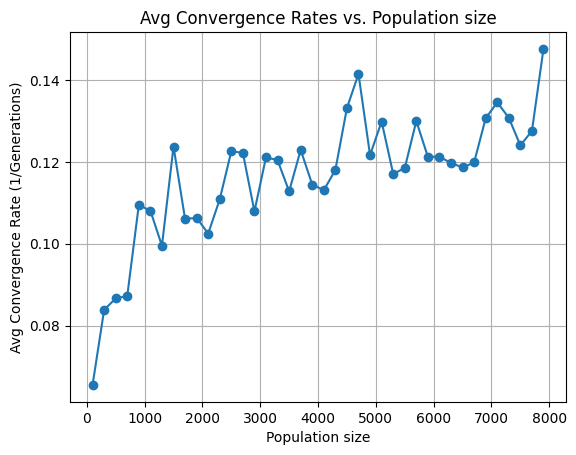

In [85]:
convergence_rates = []

for population_size in population_sizes:
    population = generate_population(population_size)
    print(f'Population size: {population_size}:')            
    run_results = []
    for _ in range(num_of_runs):  # Run the algorithm multiple times to average results
        generations = run_algorithm(max_generations, passcode, population.copy(),    
                                    mutation_rates[0], crossover_rates[0], 
                                    elite_size_rates[0], tournament_sizes[0])
        run_results.append(1/generations if generations > 0 else 0)

    avg_convergence_rate = np.mean(run_results)
    convergence_rates.append(avg_convergence_rate)

plt.figure()
plt.plot(population_sizes, convergence_rates, marker='o')
plt.xlabel('Population size')
plt.ylabel('Avg Convergence Rate (1/Generations)')
plt.title('Avg Convergence Rates vs. Population size')
plt.grid(True)
plt.show()

In [86]:
pop_conv_pairs = list(zip(population_sizes, convergence_rates))

optimal_population_size, highest_convergence_rate = max(pop_conv_pairs, key=lambda pair: pair[1])

print(f"The optimal population size is {optimal_population_size}, with a Convergence Rate of {highest_convergence_rate}.")

The optimal population size is 7900, with a Convergence Rate of 0.1475793650793651.


### Define Population with the optimal population size

In [87]:
population = generate_population(optimal_population_size)

### Different mutation rates

Mutation Rate: 0.3:
Passcode cracked in 8 generations and in 0.3515584468841553 seconds!
Passcode cracked in 7 generations and in 0.32883334159851074 seconds!
Passcode cracked in 8 generations and in 0.3347177505493164 seconds!
Passcode cracked in 10 generations and in 0.5341427326202393 seconds!
Passcode cracked in 7 generations and in 0.34940505027770996 seconds!
Passcode cracked in 8 generations and in 0.4729034900665283 seconds!
Passcode cracked in 8 generations and in 0.37941837310791016 seconds!
Passcode cracked in 9 generations and in 0.4598114490509033 seconds!
Passcode cracked in 6 generations and in 0.31725072860717773 seconds!
Passcode cracked in 8 generations and in 0.4534132480621338 seconds!
Mutation Rate: 0.31:
Passcode cracked in 8 generations and in 0.44800472259521484 seconds!
Passcode cracked in 9 generations and in 0.5553748607635498 seconds!
Passcode cracked in 8 generations and in 0.40121960639953613 seconds!
Passcode cracked in 8 generations and in 0.445084571838

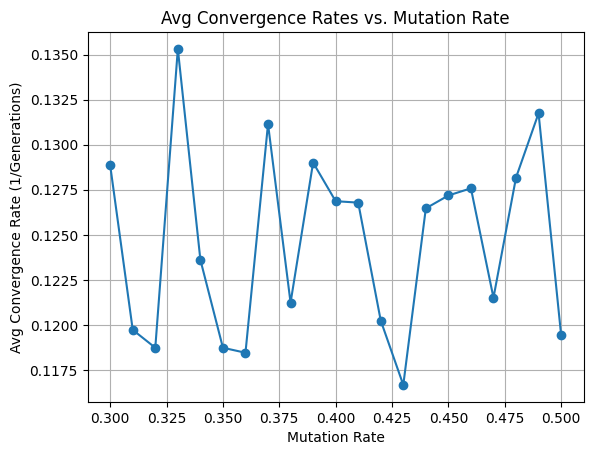

In [88]:
convergence_rates = []

for mutation_rate in mutation_rates:
    print(f'Mutation Rate: {mutation_rate}:') 
    run_results = []
    for _ in range(num_of_runs):
        generations = run_algorithm(max_generations, passcode, population.copy(), 
                                    mutation_rate, crossover_rates[0], 
                                    elite_size_rates[0], tournament_sizes[0])
        run_results.append(1/generations if generations > 0 else 0)

    avg_convergence_rate = np.mean(run_results)
    convergence_rates.append(avg_convergence_rate)

plt.figure()
plt.plot(mutation_rates, convergence_rates, marker='o')
plt.xlabel('Mutation Rate')
plt.ylabel('Avg Convergence Rate (1/Generations)')
plt.title('Avg Convergence Rates vs. Mutation Rate')
plt.grid(True)
plt.show()

In [89]:
mutation_conv_pairs = list(zip(mutation_rates, convergence_rates))

optimal_mutation_rate, highest_convergence_rate = max(mutation_conv_pairs, key=lambda pair: pair[1])

print(f"The Optimal mutation rate is {optimal_mutation_rate}, with a convergence rate of {highest_convergence_rate}.")

The Optimal mutation rate is 0.33, with a convergence rate of 0.13531746031746034.


### Different Crossover Rates

Crossover Rate: 0.6:
Passcode cracked in 8 generations and in 0.3072197437286377 seconds!
Passcode cracked in 8 generations and in 0.24141454696655273 seconds!
Passcode cracked in 9 generations and in 0.2752647399902344 seconds!
Passcode cracked in 8 generations and in 0.24004006385803223 seconds!
Passcode cracked in 8 generations and in 0.23195314407348633 seconds!
Passcode cracked in 8 generations and in 0.22609376907348633 seconds!
Passcode cracked in 8 generations and in 0.22589898109436035 seconds!
Passcode cracked in 8 generations and in 0.2095353603363037 seconds!
Passcode cracked in 9 generations and in 0.25542783737182617 seconds!
Passcode cracked in 8 generations and in 0.217742919921875 seconds!
Crossover Rate: 0.61:
Passcode cracked in 7 generations and in 0.18941092491149902 seconds!
Passcode cracked in 9 generations and in 0.24745845794677734 seconds!
Passcode cracked in 6 generations and in 0.16054558753967285 seconds!
Passcode cracked in 4 generations and in 0.109225511

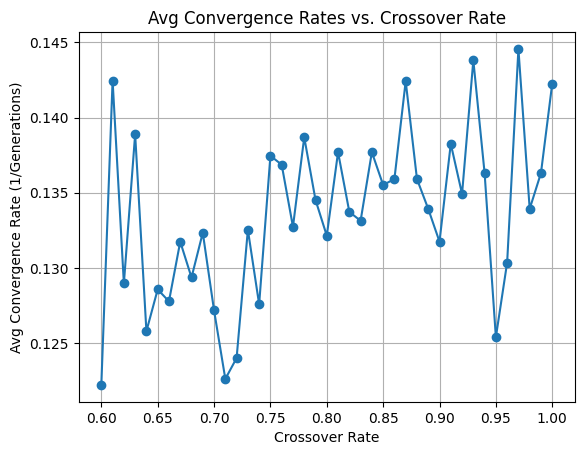

In [90]:
convergence_rates = []

for crossover_rate in crossover_rates:
    print(f'Crossover Rate: {crossover_rate}:') 
    run_results = []
    for _ in range(num_of_runs):
        generations = run_algorithm(max_generations, passcode, population.copy(), 
                                    optimal_mutation_rate, crossover_rate, 
                                    elite_size_rates[0], tournament_sizes[0])
        run_results.append(1/generations if generations > 0 else 0)

    avg_convergence_rate = np.mean(run_results)
    convergence_rates.append(avg_convergence_rate)

plt.figure()
plt.plot(crossover_rates, convergence_rates, marker='o')
plt.xlabel('Crossover Rate')
plt.ylabel('Avg Convergence Rate (1/Generations)')
plt.title('Avg Convergence Rates vs. Crossover Rate')
plt.grid(True)
plt.show()

In [91]:
crossover_conv_pairs = list(zip(crossover_rates, convergence_rates))

optimal_crossover_rate, highest_convergence_rate = max(crossover_conv_pairs, key=lambda pair: pair[1])

print(f"The optimal elite size rate is {optimal_crossover_rate}, with a convergence rate of {highest_convergence_rate}.")

The optimal elite size rate is 0.97, with a convergence rate of 0.14456349206349206.


### Different elite sizes

Elite Size Rate: 0.05:
Passcode cracked in 7 generations and in 0.379178524017334 seconds!
Passcode cracked in 8 generations and in 0.3662850856781006 seconds!
Passcode cracked in 8 generations and in 0.2867553234100342 seconds!
Passcode cracked in 8 generations and in 0.38167619705200195 seconds!
Passcode cracked in 8 generations and in 0.3785111904144287 seconds!
Passcode cracked in 8 generations and in 0.28948497772216797 seconds!
Passcode cracked in 6 generations and in 0.23462390899658203 seconds!
Passcode cracked in 8 generations and in 0.3070347309112549 seconds!
Passcode cracked in 8 generations and in 0.3178365230560303 seconds!
Passcode cracked in 8 generations and in 0.34641194343566895 seconds!
Elite Size Rate: 0.06:
Passcode cracked in 7 generations and in 0.29801487922668457 seconds!
Passcode cracked in 7 generations and in 0.3221001625061035 seconds!
Passcode cracked in 6 generations and in 0.2827458381652832 seconds!
Passcode cracked in 8 generations and in 0.3655147552

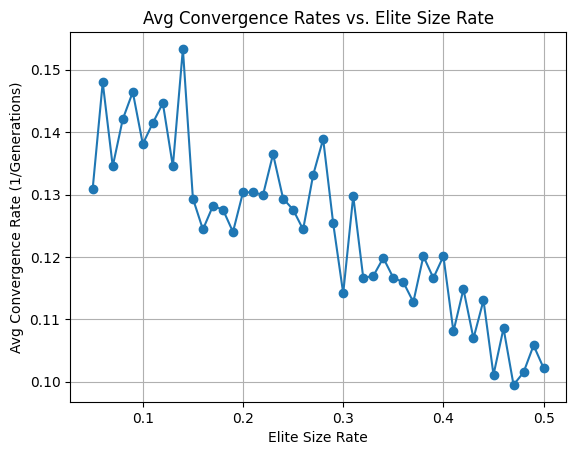

In [92]:
convergence_rates = []

for elite_size_rate in elite_size_rates:
    print(f'Elite Size Rate: {elite_size_rate}:') 
    run_results = []
    for _ in range(num_of_runs):
        generations = run_algorithm(max_generations, passcode, population.copy(), 
                                    optimal_mutation_rate, optimal_crossover_rate, 
                                    elite_size_rate, tournament_sizes[0])
        run_results.append(1/generations if generations > 0 else 0)

    avg_convergence_rate = np.mean(run_results)
    convergence_rates.append(avg_convergence_rate)

plt.figure()
plt.plot(elite_size_rates, convergence_rates, marker='o')
plt.xlabel('Elite Size Rate')
plt.ylabel('Avg Convergence Rate (1/Generations)')
plt.title('Avg Convergence Rates vs. Elite Size Rate')
plt.grid(True)
plt.show()

In [93]:
elite_conv_pairs = list(zip(elite_size_rates, convergence_rates))

optimal_elite_size_rate, highest_convergence_rate = max(elite_conv_pairs, key=lambda pair: pair[1])

print(f"The optimal elite size rate is {optimal_elite_size_rate}, with a convergence rate of {highest_convergence_rate}.")

The optimal elite size rate is 0.14, with a convergence rate of 0.15333333333333332.


### Different tournament sizes

Tournament Size: 2:
Passcode cracked in 6 generations and in 0.36674022674560547 seconds!
Passcode cracked in 7 generations and in 0.35846710205078125 seconds!
Passcode cracked in 7 generations and in 0.3498680591583252 seconds!
Passcode cracked in 9 generations and in 0.46510839462280273 seconds!
Passcode cracked in 6 generations and in 0.31733059883117676 seconds!
Passcode cracked in 7 generations and in 0.33663344383239746 seconds!
Passcode cracked in 7 generations and in 0.33985161781311035 seconds!
Passcode cracked in 8 generations and in 0.41414475440979004 seconds!
Passcode cracked in 6 generations and in 0.2984602451324463 seconds!
Passcode cracked in 8 generations and in 0.3329761028289795 seconds!
Tournament Size: 4:
Passcode cracked in 5 generations and in 0.26433706283569336 seconds!
Passcode cracked in 5 generations and in 0.2900965213775635 seconds!
Passcode cracked in 5 generations and in 0.3232154846191406 seconds!
Passcode cracked in 5 generations and in 0.282928228378

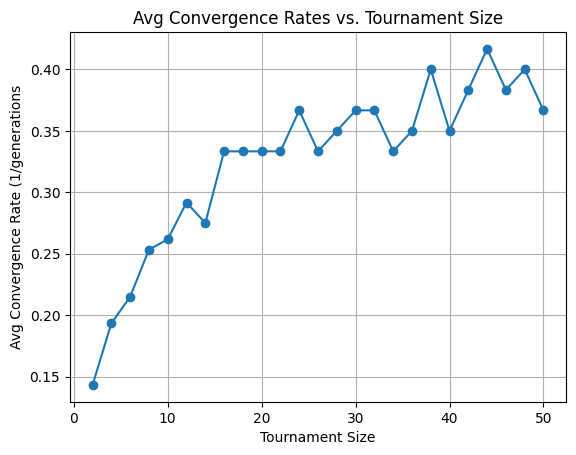

In [94]:
convergence_rates = []

for tournament_size in tournament_sizes:
    print(f'Tournament Size: {tournament_size}:') 
    run_results = []
    for _ in range(num_of_runs):
        generations = run_algorithm(max_generations, passcode, population.copy(), 
                                    optimal_mutation_rate, optimal_crossover_rate, 
                                    optimal_elite_size_rate, tournament_size)
        run_results.append(1/generations if generations > 0 else 0)

    avg_convergence_rate = np.mean(run_results)
    convergence_rates.append(avg_convergence_rate)

plt.figure()
plt.plot(tournament_sizes, convergence_rates, marker='o')
plt.xlabel('Tournament Size')
plt.ylabel('Avg Convergence Rate (1/generations')
plt.title('Avg Convergence Rates vs. Tournament Size')
plt.grid(True)
plt.show()

In [95]:
tourn_conv_pairs = list(zip(tournament_sizes, convergence_rates))

optimal_tournament_size, highest_convergence_rate = max(tourn_conv_pairs, key=lambda pair: pair[1])

print(f"The optimal tournament size rate is {optimal_tournament_size}, with a convergence rate of {highest_convergence_rate}.")

The optimal tournament size rate is 44, with a convergence rate of 0.41666666666666663.


## Conclusion

In [96]:
print('Best parameter values:')
print(f'Population size: {optimal_population_size}')
print(f'Mutation rate: {optimal_mutation_rate}')
print(f'Crossover rate: {optimal_crossover_rate}')
print(f'Elite size rate: {optimal_elite_size_rate}')
print(f'Tournament size: {optimal_tournament_size}')

Best parameter values:
Population size: 7900
Mutation rate: 0.33
Crossover rate: 0.97
Elite size rate: 0.14
Tournament size: 44


In [97]:
# generate a new population with the optimal population size
population = generate_population(optimal_population_size)

# run the algorithm with the optimal parameter values
run_algorithm(max_generations, passcode, population, optimal_mutation_rate, optimal_crossover_rate, optimal_elite_size_rate, optimal_tournament_size)

Passcode cracked in 3 generations and in 0.5267832279205322 seconds!


3